In [1]:
import powerlaw
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the eggo-Facebook dataset, available at https://snap.stanford.edu/data/ego-Facebook.html
ego_fb_edges_fn = "../../data_shared/facebook_combined.txt"
with open(ego_fb_edges_fn, "r") as file:
    lines = [ line.strip().split(" ") for line in file.readlines() ]
    edges = [ (int(n1), int(n2)) for (n1, n2) in lines ]
g2 = nx.Graph(edges)
print(g2)
degree_cent = nx.degree_centrality(g2)
values = list(degree_cent.values())

Graph with 4039 nodes and 88234 edges


In [3]:
def get_histogram(values, increments=50, cumulative=False):
    vMin, vMax = min(values), max(values)
    inc = (vMax-vMin) / increments
    bins = [vMin + i*inc for i in range(increments)]
    if not cumulative:
        return [ len([v for v in values if bin <= v and v < (bin+inc)]) for bin in bins ], bins
    else:
        return [ len([v for v in values if v < (bin+inc)]) for bin in bins ], bins

In [4]:
increments=50
v_min, v_max = min(values), max(values)
inc = (v_max - v_min) / increments
X = np.logspace(np.log10(v_min), np.log10(v_max), increments) # generate log distributed x values
#X = [v_min + i*inc for i in range(increments)]
Y = [ len([v for v in values if X[i] <= v and v < X[i+1]])+1 for i in range(len(X)-1) ]
lnX, lnY = np.log(X), np.log(Y)

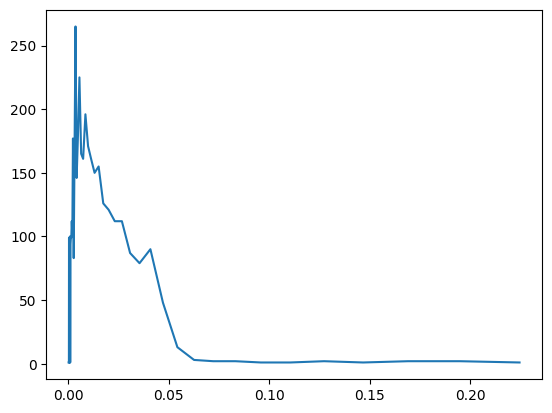

In [5]:
plt.plot(X[:49], Y)
plt.show()

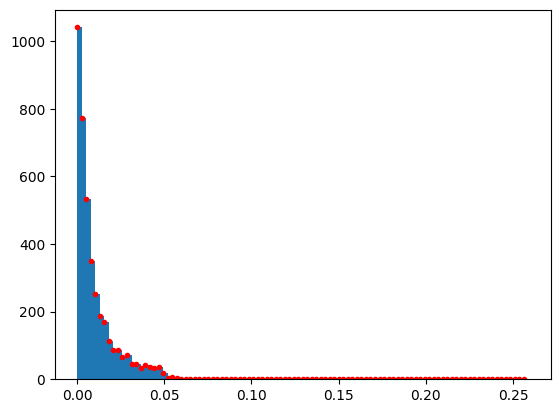

In [6]:
hist_values, bins = get_histogram(values, increments=100, cumulative=False)
plt.hist(values, bins=len(bins))
plt.plot(bins, hist_values, 'r.')
plt.show()

In [7]:
# power law analysis
results = powerlaw.Fit(hist_values)
R, p = results.distribution_compare('power_law', 'lognormal')

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [8]:
print("alpha:", results.power_law.alpha)
print("xmin:", results.power_law.xmin)
print('R:', R)
print('p:', p)

alpha: 1.8338918309856673
xmin: 33.0
R: -0.10413356824365794
p: 0.7718518032716292
